In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
from modAL.models import ActiveLearner

In [3]:
X = np.random.choice(np.linspace(0, 20, 10000), size=200, replace=False).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

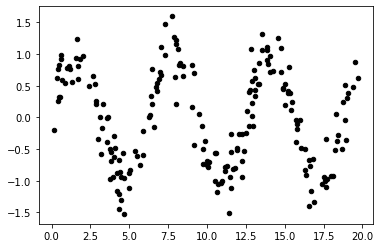

In [4]:
plt.scatter(X, y, c='k', s=20)
plt.show()

In [5]:
def GP_regression_std(regressor: GaussianProcessRegressor, X: np.ndarray) -> tuple:
    _, std = regressor.predict(X, return_std=True)
    query_index = np.argmax(std)
    return query_index, X[query_index]

In [7]:
n_initial = 5
initial_index = np.random.choice(range(len(X)), size=n_initial, replace=False)
X_training, y_training = X[initial_index], y[initial_index]

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

regressor = ActiveLearner(
    estimator=GaussianProcessRegressor(kernel=kernel),
    query_strategy=GP_regression_std,
    X_training=X_training.reshape(-1, 1), y_training=y_training.reshape(-1, 1)
)

In [9]:
X_grid = np.linspace(0, 20, 1000)
y_pred, y_std = regressor.predict(X_grid.reshape(-1, 1), return_std=True)
y_pred, y_std = y_pred.ravel(), y_std.ravel()

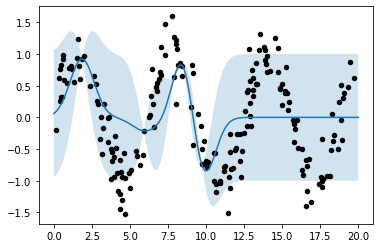

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_grid, y_pred)
plt.fill_between(X_grid, y_pred-y_std, y_pred+y_std, alpha=0.2)
plt.scatter(X, y, c='k', s=20)
plt.show()

In [11]:
n_queries = 10
for index in range(n_queries):
    query_index, query_instance = regressor.query(X)
    regressor.teach(X[query_index].reshape(1, -1), y[query_index].reshape(1, -1))

In [12]:
y_pred_final, y_std_final = regressor.predict(X_grid.reshape(-1, 1), return_std=True)
y_pred_final, y_std_final = y_pred_final.ravel(), y_std_final.ravel()

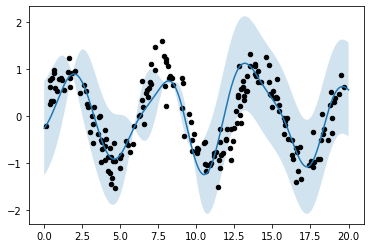

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_grid, y_pred_final)
plt.fill_between(X_grid, y_pred_final-y_std, y_pred_final+y_std, alpha=0.2)
plt.scatter(X, y, c='k', s=20)
plt.show()